# Data Analysis

This notebook is a short tutorial for data analysis with the datamodule.

# Import Libraries

In [1]:
import sys
sys.path.append('../')
from UtilitiesLib import * # All the functions we will need
# Display plots directly inside this notebook:
%matplotlib inline

UtilitiesLib v1.1.1
DataModule v1.0.3
circuit v1.1.1


# Circlefit

## Import sample data
Here we use the measured data of a stripline resonator to illustrate the circle fit routine.

In [2]:
data = dm.load_datamodule('sample_data/slr_30dbm_20MHz.dm')

The VNA allows measurements of magnitude and phase shift of a transmitted signal. This can be also represented by a complex Voltage, where the transmission magnitude is the absolute value and the phase is the complex argument of the c-Number. 

We can directly have a look at the raw data.

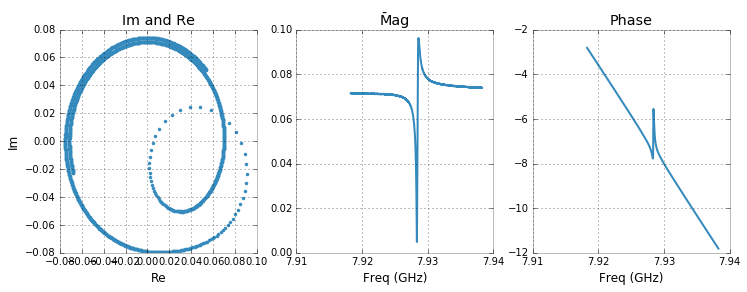

In [3]:
data.plot_rawdata()

The three plots illustrate the raw data. In the first figure, we see the Imaginary part over the Real part. The second figure shows the absolute magnitude and the third figure shows the phase behavior. 

## Circle Fit routine

The datamodule possesses a circlefit routine. With this function, we can fit the complex data to our model. At the moment, the routine supports two models:

1. A resonator coupled to a transmission line/waveguide. This is called **Notch** or **Hanger**  configuration. Here we need to measure the **S21** or transmitted signal.
2. A resonator measured in **reflection** configuration Here we need to measure the **S11** or reflection signal. 

*(Improvement idea for this notebook: Add sketches of each model.)*


The striplines are just small antennas placed inside a waveguide. Therefore, we are using the **Notch** configuration. The following fit routine tries to fit a circle to the corrected resonator data and outputs directly the following parameters:

|Parameter | Description |
|----------|-------------|
| $Q_l$    | **Loaded** or **total** Quality Factor |
| $Q_c$    | **Coupling/coupled** Quality Factor |
| $Q_{\mathrm{int}}$ | **Internal** Quality Factor |
| $f_r$    | (corrected) Resonance frequency |
| $\varphi_0$ | Impedance mismatch |

         Values    Errors
Ql        33394    38.999
Qc        36609    32.539
Qint 3.8023e+05    5622.9
fr       7.9285 1.043e-07
phi0   -0.75444 0.0008533
With power: 0 dbm, span of: 0.02 GHz



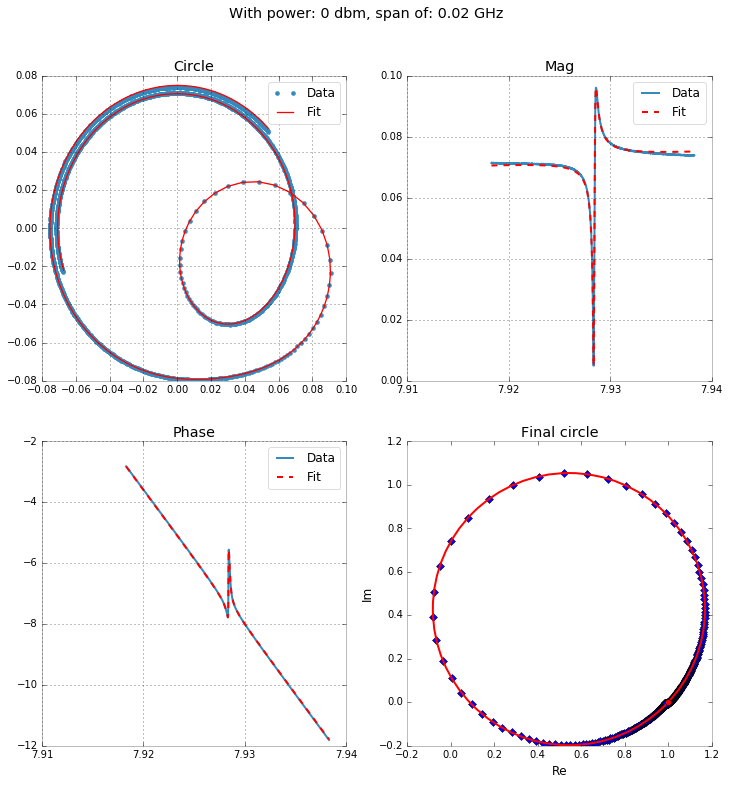

In [4]:
data.do_circle_fit_notch(plot_res=True)

We see a very good accordance to the model. This is also visible in the low errors.

However, if at some point the fit does not converge or shows a strange behaviour, we can check the individual stages of the fit routine with the command and check where it went wrong.

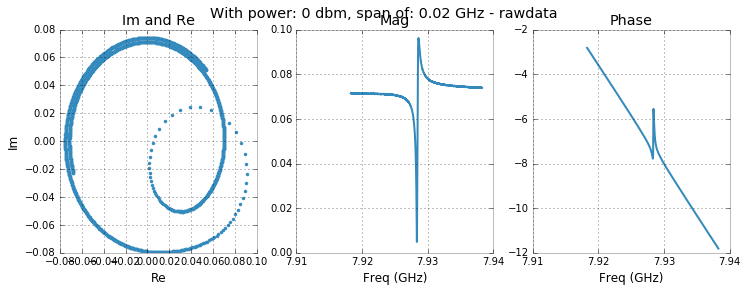

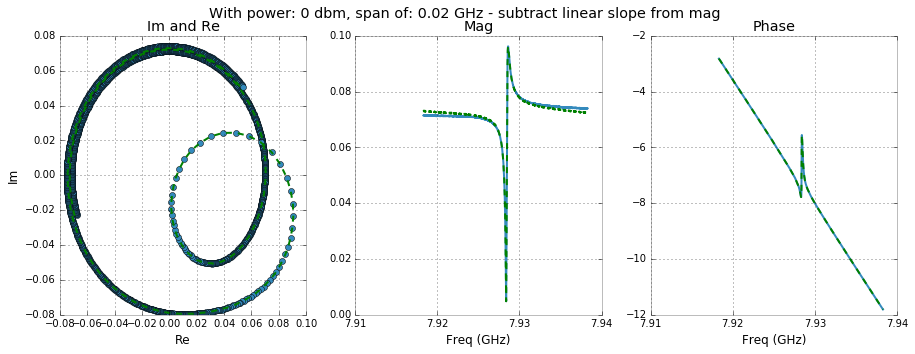

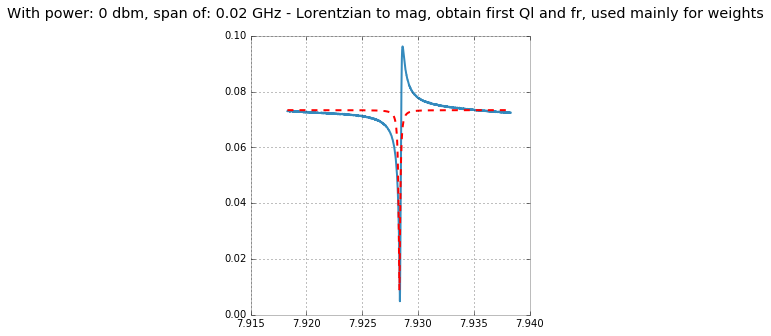

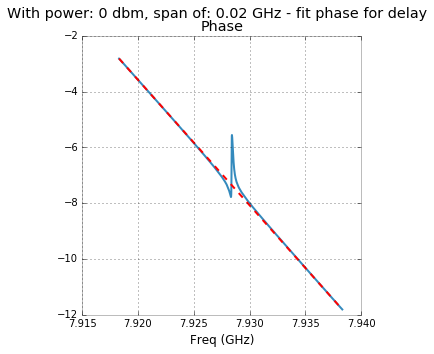

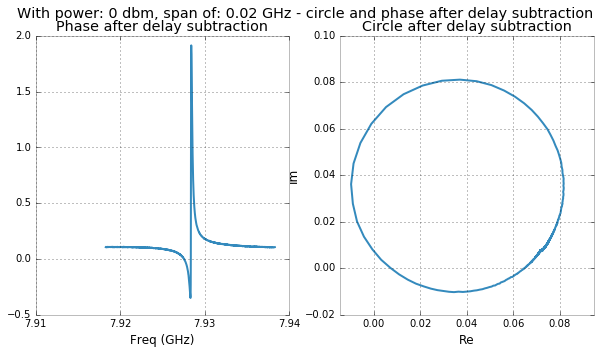

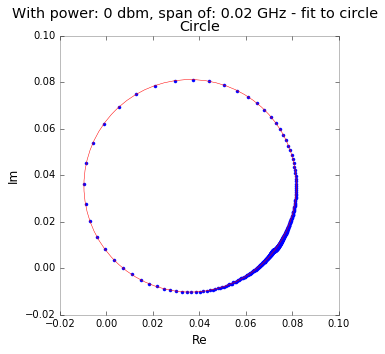

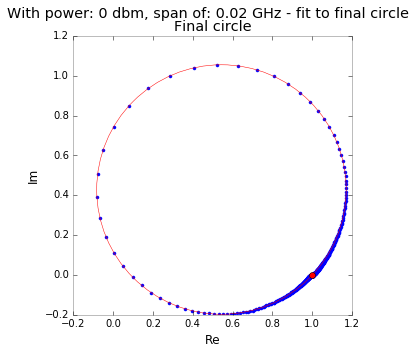

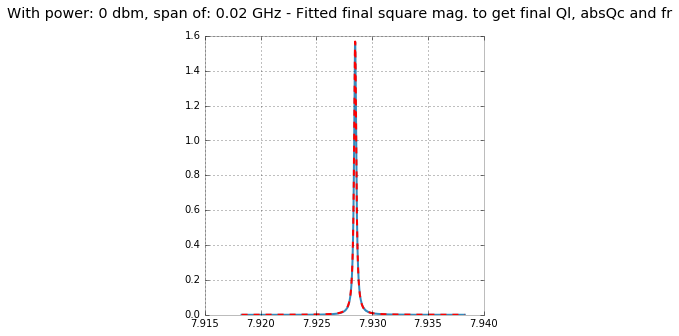

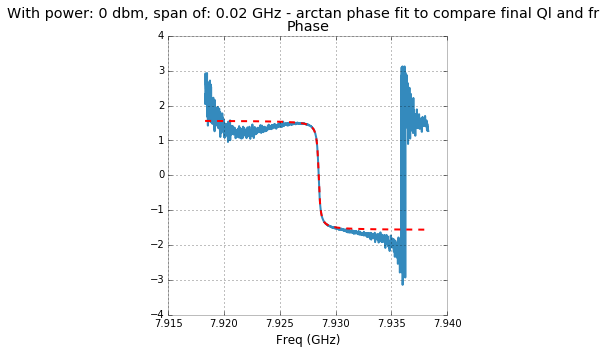

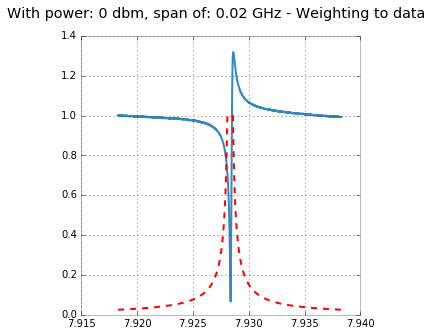

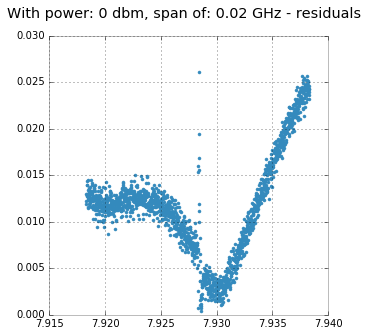

In [5]:
data.plot_steps()

## Access fit parameters
We can access the fit parameters by the following command. This can be usefull for the evaluation of multiple data sets with a for loop.

In [6]:
data.fitresults

,Values,Errors
Ql,33394,38.999
Qc,36609,32.539
Qint,3.8023e+05,5622.9
fr,7.9285,1.043e-07
phi0,-0.75444,0.0008533


An individual value can be obtain by

In [7]:
data.fitresults.loc['Ql', 'Values']

33393.974444001913

And the errors with

In [8]:
data.fitresults.loc['Ql', 'Errors']

38.998650884339476